In [2]:
import pandas as pd

# Load the CSV file
file_path = 'trichy_region_0.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,SI.No,Unique id,Tank Name,Village,Block,Taluk,District,Subbasin,Basin,Unnamed: 9
0,1,TNAG03T0730,Aathi kanmoi,Aathi,Thirumayam,Thirumayam,Pudukottai,South Vellar,Agniyar,NaN
1,2,TNAG03T0530,Aathidevankulam,Thirumalairaya\nsamudram,Pudukkottai,Pudukkottai,Pudukottai,South Vellar,Agniyar,NaN
2,3,TNVE01T0104,Abinavam Tank,Abinavam,Pethanickenpalyam,Attur,Salem,Upper Vellar,Vellar,NaN
3,4,TNCY030092,Achampalli Tank,Konganapuram,Konganapuram,Idappadi,Salem,Mettur Reservoir to Noyel Confluence,Cauvery,NaN
4,5,TNCY180640,Achan Eri,Achanpatti,Budalur,Thanjavur,Thanjavur,Cauvery delta,Cauvery,NaN


In [3]:
# Check for missing values in each column
data.isnull().sum()


SI.No            0
Unique id        0
Tank Name        0
Village          0
Block            0
Taluk            0
District         0
Subbasin         0
Basin            0
Unnamed: 9    2352
dtype: int64

In [4]:
data_cleaned = data.dropna()

In [5]:
print(data.isnull().sum())

SI.No            0
Unique id        0
Tank Name        0
Village          0
Block            0
Taluk            0
District         0
Subbasin         0
Basin            0
Unnamed: 9    2352
dtype: int64


In [6]:
data_cleaned = data.dropna()

In [7]:
# Check unique values in 'Unnamed: 9' to understand its content
unique_basin_subnames = data['Unnamed: 9'].unique()
print(unique_basin_subnames)


[nan]


In [8]:
data['Unnamed: 9'].fillna('Unknown', inplace=True)


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_7128\1013864971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Unnamed: 9'].fillna('Unknown', inplace=True)
C:\Users\mathew.j\AppData\Local\Temp\ipykernel_7128\1013864971.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data['Unnamed: 9'].fillna('Unknown', inplace=True)


In [9]:
data.rename(columns={'Unnamed: 9': 'basin_subname'}, inplace=True)


In [10]:
print(data.isnull().sum())


SI.No            0
Unique id        0
Tank Name        0
Village          0
Block            0
Taluk            0
District         0
Subbasin         0
Basin            0
basin_subname    0
dtype: int64


In [11]:
# Fill missing basin_subname values with 'Unknown'
data['basin_subname'].fillna('Unknown', inplace=True)


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_7128\1145816170.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['basin_subname'].fillna('Unknown', inplace=True)


In [12]:
# Example: Create a dictionary to map basins to subnames
basin_subname_mapping = {
    'Basin_1': 'Subname_1',
    'Basin_2': 'Subname_2',
    # Add other basin-to-subname mappings here
}

# Fill missing subnames based on the Basin column
data['basin_subname'] = data.apply(
    lambda row: basin_subname_mapping.get(row['Basin'], 'Unknown') 
    if pd.isnull(row['basin_subname']) else row['basin_subname'], 
    axis=1
)


In [13]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()


In [14]:
# Check data types
print(data.dtypes)

# Convert specific columns if necessary (e.g., to datetime or numeric)
# data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')


SI.No             int64
Unique id        object
Tank Name        object
Village          object
Block            object
Taluk            object
District         object
Subbasin         object
Basin            object
basin_subname    object
dtype: object


In [15]:
# Get summary statistics
print(data.describe(include='all'))


              SI.No    Unique id  Tank Name   Village          Block  \
count   2352.000000         2352       2352      2352           2352   
unique          NaN         2352       2212      1374             95   
top             NaN  TNAG03T1193  Pudukulam  Varpattu  Avudaiyarkoil   
freq            NaN            1         24        16            166   
mean    1176.500000          NaN        NaN       NaN            NaN   
std      679.108239          NaN        NaN       NaN            NaN   
min        1.000000          NaN        NaN       NaN            NaN   
25%      588.750000          NaN        NaN       NaN            NaN   
50%     1176.500000          NaN        NaN       NaN            NaN   
75%     1764.250000          NaN        NaN       NaN            NaN   
max     2352.000000          NaN        NaN       NaN            NaN   

               Taluk    District Subbasin    Basin basin_subname  
count           2352        2352     2352     2352          2352  
u

In [19]:
print(data.describe(include='all'))


              SI.No    Unique id  Tank Name   Village          Block  \
count   2352.000000         2352       2352      2352           2352   
unique          NaN         2352       2212      1374             95   
top             NaN  TNAG03T1193  Pudukulam  Varpattu  Avudaiyarkoil   
freq            NaN            1         24        16            166   
mean    1176.500000          NaN        NaN       NaN            NaN   
std      679.108239          NaN        NaN       NaN            NaN   
min        1.000000          NaN        NaN       NaN            NaN   
25%      588.750000          NaN        NaN       NaN            NaN   
50%     1176.500000          NaN        NaN       NaN            NaN   
75%     1764.250000          NaN        NaN       NaN            NaN   
max     2352.000000          NaN        NaN       NaN            NaN   

               Taluk    District Subbasin    Basin basin_subname  
count           2352        2352     2352     2352          2352  
u

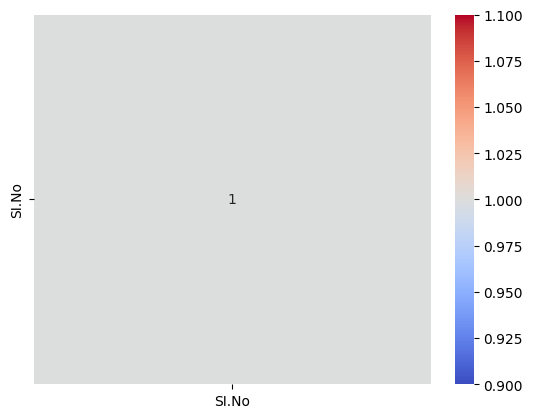

In [20]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix for only numeric columns
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [23]:
print(data.columns)


Index(['SI.No', 'Unique id', 'Tank Name', 'Village', 'Block', 'Taluk',
       'District', 'Subbasin', 'Basin', 'basin_subname'],
      dtype='object')


In [24]:
# Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Check standardized column names
print(data.columns)


Index(['si.no', 'unique_id', 'tank_name', 'village', 'block', 'taluk',
       'district', 'subbasin', 'basin', 'basin_subname'],
      dtype='object')


In [25]:
# Drop columns that are not needed
data_cleaned = data.drop(columns=['unique_id', 'tank_name', 'village', 'block', 'taluk', 'district'], errors='ignore')


In [5]:
# Print the list of columns to verify names
print(data.columns)

Index(['SI.No', 'Unique id', 'Tank Name', 'Village', 'Block', 'Taluk',
       'District', 'Subbasin', 'Basin', 'Unnamed: 9'],
      dtype='object')


In [6]:
# List of columns to drop if they exist
columns_to_drop = ['si.no', 'unique_id', 'tank_name', 'village', 'block', 'taluk', 'district']

# Drop columns that are in the DataFrame
data_cleaned = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Select only numeric columns for correlation analysis
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()


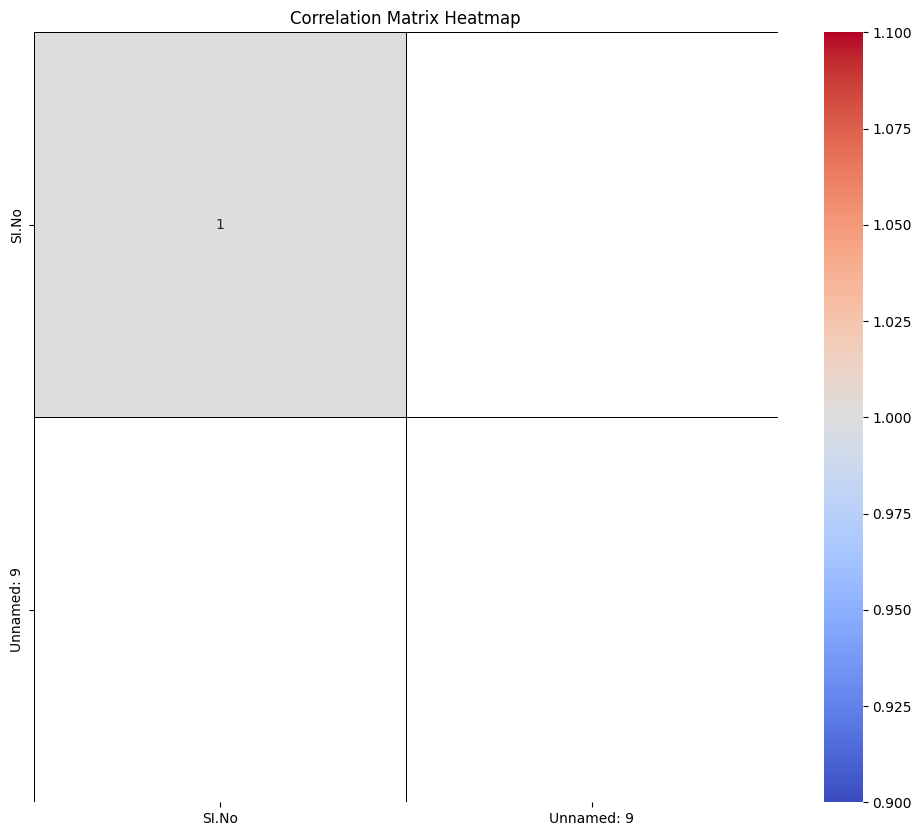

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()


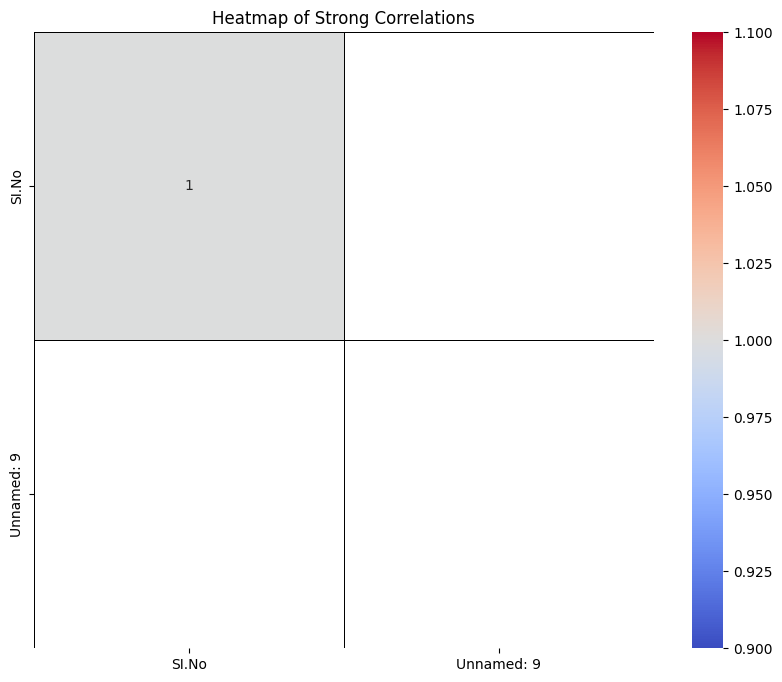

In [10]:
# Set threshold for strong correlations (e.g., absolute correlation > 0.5)
threshold = 0.5

# Create a mask to filter strong correlations
strong_correlations = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
plt.figure(figsize=(10, 8))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', mask=strong_correlations.isnull())
plt.title('Heatmap of Strong Correlations')
plt.show()


In [12]:
# Print column names to verify
print(numeric_data.columns)


Index(['SI.No', 'Unnamed: 9'], dtype='object')


In [17]:
# Print the column names of the numeric data
print(numeric_data.columns)


Index(['SI.No', 'Unnamed: 9'], dtype='object')


In [21]:
import pandas as pd

# Load the CSV file
file_path = 'trichy_region_0.csv'
data = pd.read_csv(file_path)

# Group by 'District' (or the relevant city column) and count the number of tanks
# Assume 'Tank Name' is the column that lists the water tanks
tank_counts = data.groupby('District')['Tank Name'].count().reset_index()

# Rename the columns for clarity
tank_counts.columns = ['City', 'Number of Tanks']

# Sort the results by the number of tanks
tank_counts_sorted = tank_counts.sort_values(by='Number of Tanks')


In [22]:
# Get the city with the least number of tanks
least_tanks_city = tank_counts_sorted.iloc[0]
print(f"City with the least number of water tanks: {least_tanks_city['City']} with {least_tanks_city['Number of Tanks']} tanks.")


City with the least number of water tanks: Dharmapuri with 1 tanks.


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_16052\1589050676.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Tanks', y='City', data=tank_counts_sorted, palette='viridis')


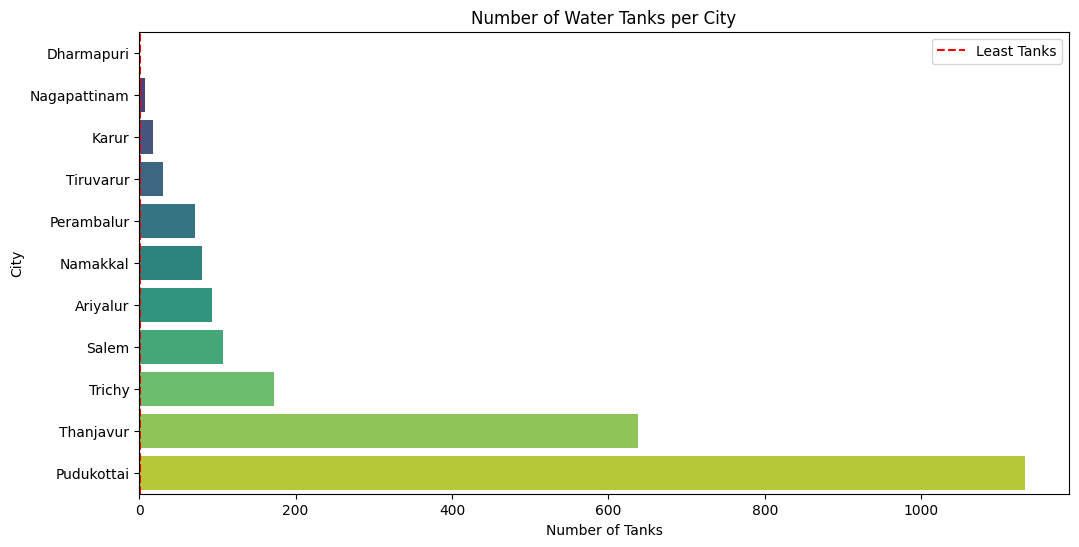

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the number of tanks per city
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Tanks', y='City', data=tank_counts_sorted, palette='viridis')
plt.title('Number of Water Tanks per City')
plt.xlabel('Number of Tanks')
plt.ylabel('City')
plt.axvline(x=least_tanks_city['Number of Tanks'], color='red', linestyle='--', label='Least Tanks')
plt.legend()
plt.show()


Subbasin with the highest usage of tanks: South Vellar with 452 tanks.


C:\Users\mathew.j\AppData\Local\Temp\ipykernel_16052\984406852.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Unique Tanks', y='Subbasin', data=subbasin_usage_sorted, palette='viridis')


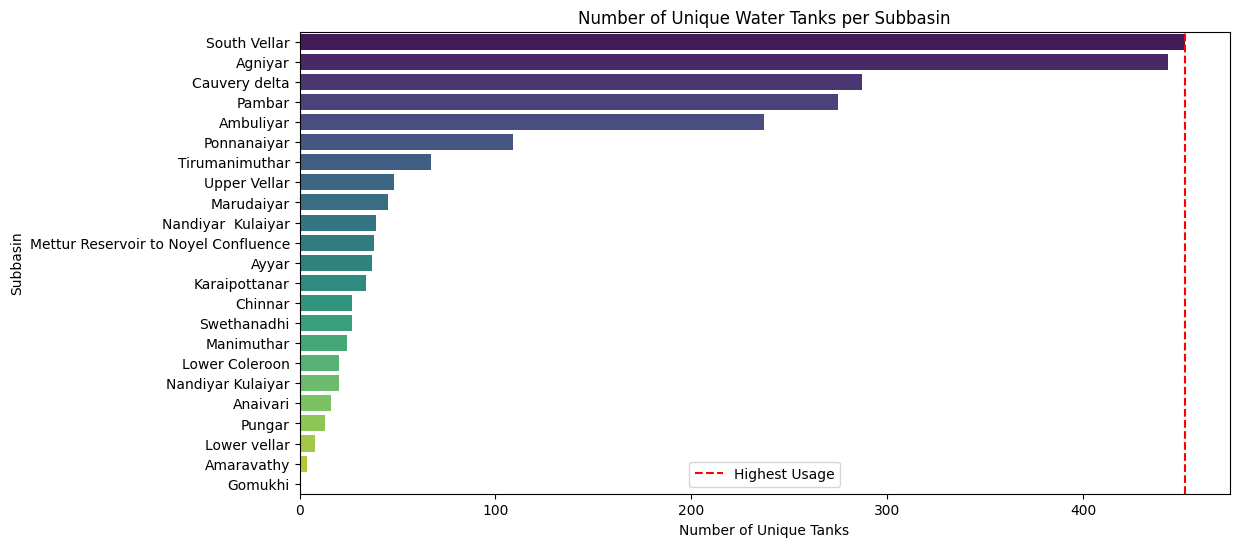

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = 'trichy_region_0.csv'
data = pd.read_csv(file_path)

# Group by 'Subbasin' and count unique 'Tank Name'
subbasin_usage = data.groupby('Subbasin')['Tank Name'].nunique().reset_index()

# Rename columns for clarity
subbasin_usage.columns = ['Subbasin', 'Number of Unique Tanks']

# Sort the results by the number of unique tanks
subbasin_usage_sorted = subbasin_usage.sort_values(by='Number of Unique Tanks', ascending=False)

# Get the subbasin with the highest number of unique tanks
highest_usage_subbasin = subbasin_usage_sorted.iloc[0]
print(f"Subbasin with the highest usage of tanks: {highest_usage_subbasin['Subbasin']} with {highest_usage_subbasin['Number of Unique Tanks']} tanks.")

# Create a bar plot for the number of unique tanks per subbasin
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Unique Tanks', y='Subbasin', data=subbasin_usage_sorted, palette='viridis')
plt.title('Number of Unique Water Tanks per Subbasin')
plt.xlabel('Number of Unique Tanks')
plt.ylabel('Subbasin')
plt.axvline(x=highest_usage_subbasin['Number of Unique Tanks'], color='red', linestyle='--', label='Highest Usage')
plt.legend()
plt.show()
